In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import read_infections_and_deaths
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from june.records import RecordReader

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

plt.style.use(['science'])
plt.style.reload_library()

In [3]:
n_runs = 8

In [4]:
DATA_DIR = # Dataset not publicly available, please contact the authors to be granted access

In [5]:
# read one people df
read = RecordReader(
    results_path=DATA_DIR / 'baselines/results/run_000'
)
people_df = read.table_to_df('population')

In [6]:
%%time

infections_dfs, deaths_dfs = [], []
for run in range(n_runs):
    inf_df, death_df = read_infections_and_deaths(
        data_dir =DATA_DIR / 'baselines/results/', run=run
    )
    infections_dfs.append(inf_df)
    deaths_dfs.append(death_df)

CPU times: user 5min 29s, sys: 1min 23s, total: 6min 52s
Wall time: 7min 16s


In [7]:
%%time

first_wave_infections_dfs, first_wave_deaths_dfs = [], []

for run in range(n_runs):
    inf_df, death_df = read_infections_and_deaths(run=run, 
            data_dir= #Dataset not publicly available, please contact the authors to be granted access
    )
    first_wave_infections_dfs.append(inf_df)
    first_wave_deaths_dfs.append(death_df)

CPU times: user 1min 40s, sys: 23.8 s, total: 2min 4s
Wall time: 2min 7s


In [8]:
def average_sumaries(summary_list):
    df_concat = pd.concat(summary_list)
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_std = by_row_index.std()   
    return df_means, df_std/np.sqrt(len(summary_list))

## Age distribution deaths

In [9]:
age_bins = np.arange(0,101,6)

n_people_by_age = people_df.groupby([pd.cut(people_df['age'],
    bins=age_bins, right=False)]).size()


In [10]:

deaths_by_age = [
    100.*death_df.groupby(
        pd.cut(
            death_df['age'], bins=age_bins, right=False
        )).size()/len(death_df)   for death_df in deaths_dfs
]

first_wave_deaths_by_age = [
    100.*death_df.groupby(
        pd.cut(
            death_df['age'], bins=age_bins, right=False
        )).size()/len(death_df)   for death_df in first_wave_deaths_dfs
]

In [11]:
avg_deaths_by_age, std_deaths_by_age = average_sumaries(deaths_by_age)
avg_first_wave_deaths_by_age, std_first_wave_deaths_by_age = average_sumaries(first_wave_deaths_by_age)

In [12]:
def revert_to_string(age):
    a = age.left
    b = age.right
    return f"{a}-{b}"

avg_deaths_by_age = avg_deaths_by_age.rename(revert_to_string)
avg_first_wave_deaths_by_age = avg_first_wave_deaths_by_age.rename(revert_to_string)

In [13]:
std_deaths_by_age = std_deaths_by_age.rename(revert_to_string)
std_first_wave_deaths_by_age = std_first_wave_deaths_by_age.rename(revert_to_string)

In [14]:
deaths_to_plot = pd.DataFrame(index=avg_deaths_by_age.index)
deaths_to_plot.loc[:, 'Projected'] = avg_deaths_by_age
deaths_to_plot.loc[:, '1st Wave'] = avg_first_wave_deaths_by_age

std_deaths_to_plot = pd.DataFrame(index=std_deaths_by_age.index)
std_deaths_to_plot.loc[:, 'Projected'] = std_deaths_by_age
std_deaths_to_plot.loc[:, '1st Wave'] = std_first_wave_deaths_by_age

2021-09-22 13:12:40,311 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,313 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,315 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,316 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,318 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,319 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,321 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:12:40,722 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,724 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,725 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,726 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,728 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,729 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:40,731 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:12:44,840 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,841 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,843 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,856 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,857 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,859 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,860 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:12:44,975 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,977 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,977 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,979 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,980 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,982 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:44,982 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:12:45,448 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,450 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,451 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,452 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,454 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,455 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,457 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:12:45,594 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,596 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,597 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,604 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,605 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,607 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:12:45,608 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

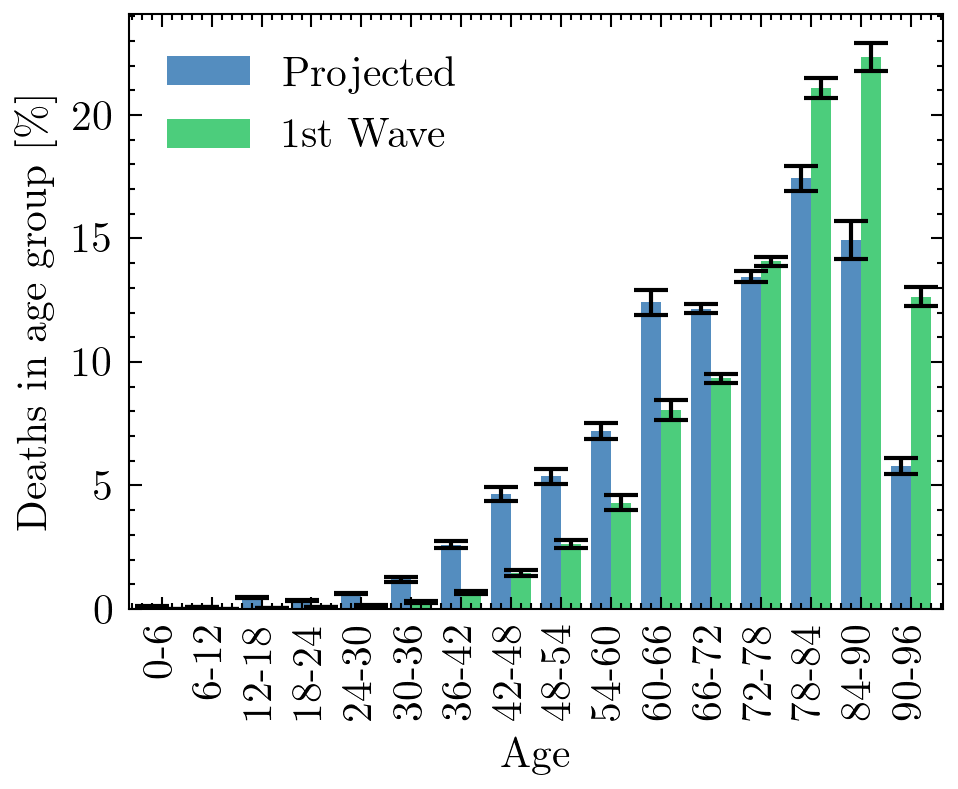

In [16]:
fig, ax = plt.subplots()


deaths_to_plot.plot.bar(
            capsize=4,
            ylabel="",
            xlabel="Age",
            width=0.8,
            alpha=0.7,
            ax=ax,
            yerr=std_deaths_to_plot,
        )
ax.set_ylabel('Deaths in age group [\%]')
plt.savefig('../figures/deaths_by_age.pdf')

## Crude fatality rates

In [17]:

n_by_vaccine_age = people_df.groupby([
                'vaccine_type', 
                pd.cut(people_df['age'],
    bins=age_bins, right=False)]).size()

In [18]:

def compute_crude_death_rate_by_age(n_by_vaccine_age, deaths_df, vaccine_type):
    if vaccine_type is not None:
        n_by_age = n_by_vaccine_age.loc[vaccine_type]
        death_df = deaths_df[(deaths_df['vaccine_type'] == vaccine_type)]
    else:
        n_by_age = n_by_vaccine_age.groupby(['age']).sum()
        death_df = deaths_df
    death_by_age = death_df.groupby([
            pd.cut(death_df['age'],
                bins=age_bins, right=False)]).size()
    death_rate = death_by_age / n_by_age
    death_rate = death_rate.fillna(0)
    return 100.*death_rate

In [19]:
avg_first_wave_drs, std_first_wave_drs = average_sumaries([
    compute_crude_death_rate_by_age(n_by_vaccine_age, deaths_df,None) 
    for deaths_df in first_wave_deaths_dfs
])


avg_unvaccinated_drs, std_unvaccinated_drs = average_sumaries([
    compute_crude_death_rate_by_age(n_by_vaccine_age, deaths_df,'none') 
    for deaths_df in deaths_dfs
])

avg_vaccinated_drs, std_vaccinated_drs = average_sumaries([
    compute_crude_death_rate_by_age(n_by_vaccine_age, deaths_df,None) 
    for deaths_df in deaths_dfs
])


In [20]:
dr_toplot = pd.DataFrame(index=avg_first_wave_drs.index)


In [21]:
dr_toplot.loc[:,'Projected Vaccinated'] = avg_vaccinated_drs
dr_toplot.loc[:,'1st Wave'] = avg_first_wave_drs
dr_toplot.loc[:,'Projected Unvaccinated'] = avg_unvaccinated_drs


In [22]:
std_dr_toplot = pd.DataFrame(index=avg_first_wave_drs.index)
std_dr_toplot.loc[:,'Projected Vaccinated'] = std_vaccinated_drs
std_dr_toplot.loc[:,'1st Wave'] = std_first_wave_drs
std_dr_toplot.loc[:,'Projected Unvaccinated'] = std_unvaccinated_drs


In [23]:

dr_toplot = dr_toplot.rename(mapper=revert_to_string)

std_dr_toplot = std_dr_toplot.rename(mapper=revert_to_string)


2021-09-22 13:13:01,794 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:01,796 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:01,798 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:01,799 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:01,801 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:01,802 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:01,804 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:09,941 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:09,942 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:09,948 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:09,949 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:09,951 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:09,952 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,494 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:10,639 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,640 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,641 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,642 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,643 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,644 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:10,645 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:15,200 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,235 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,240 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,244 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,329 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,330 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,332 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:15,406 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,407 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,409 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,410 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,412 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,412 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,414 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:15,590 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,591 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,593 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,594 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,596 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,597 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:15,599 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:15,787 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,488 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,490 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,492 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,493 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,494 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,496 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:16,570 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,572 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,573 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,575 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,576 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,578 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,579 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:16,763 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,791 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,793 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,796 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,797 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,800 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:16,801 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

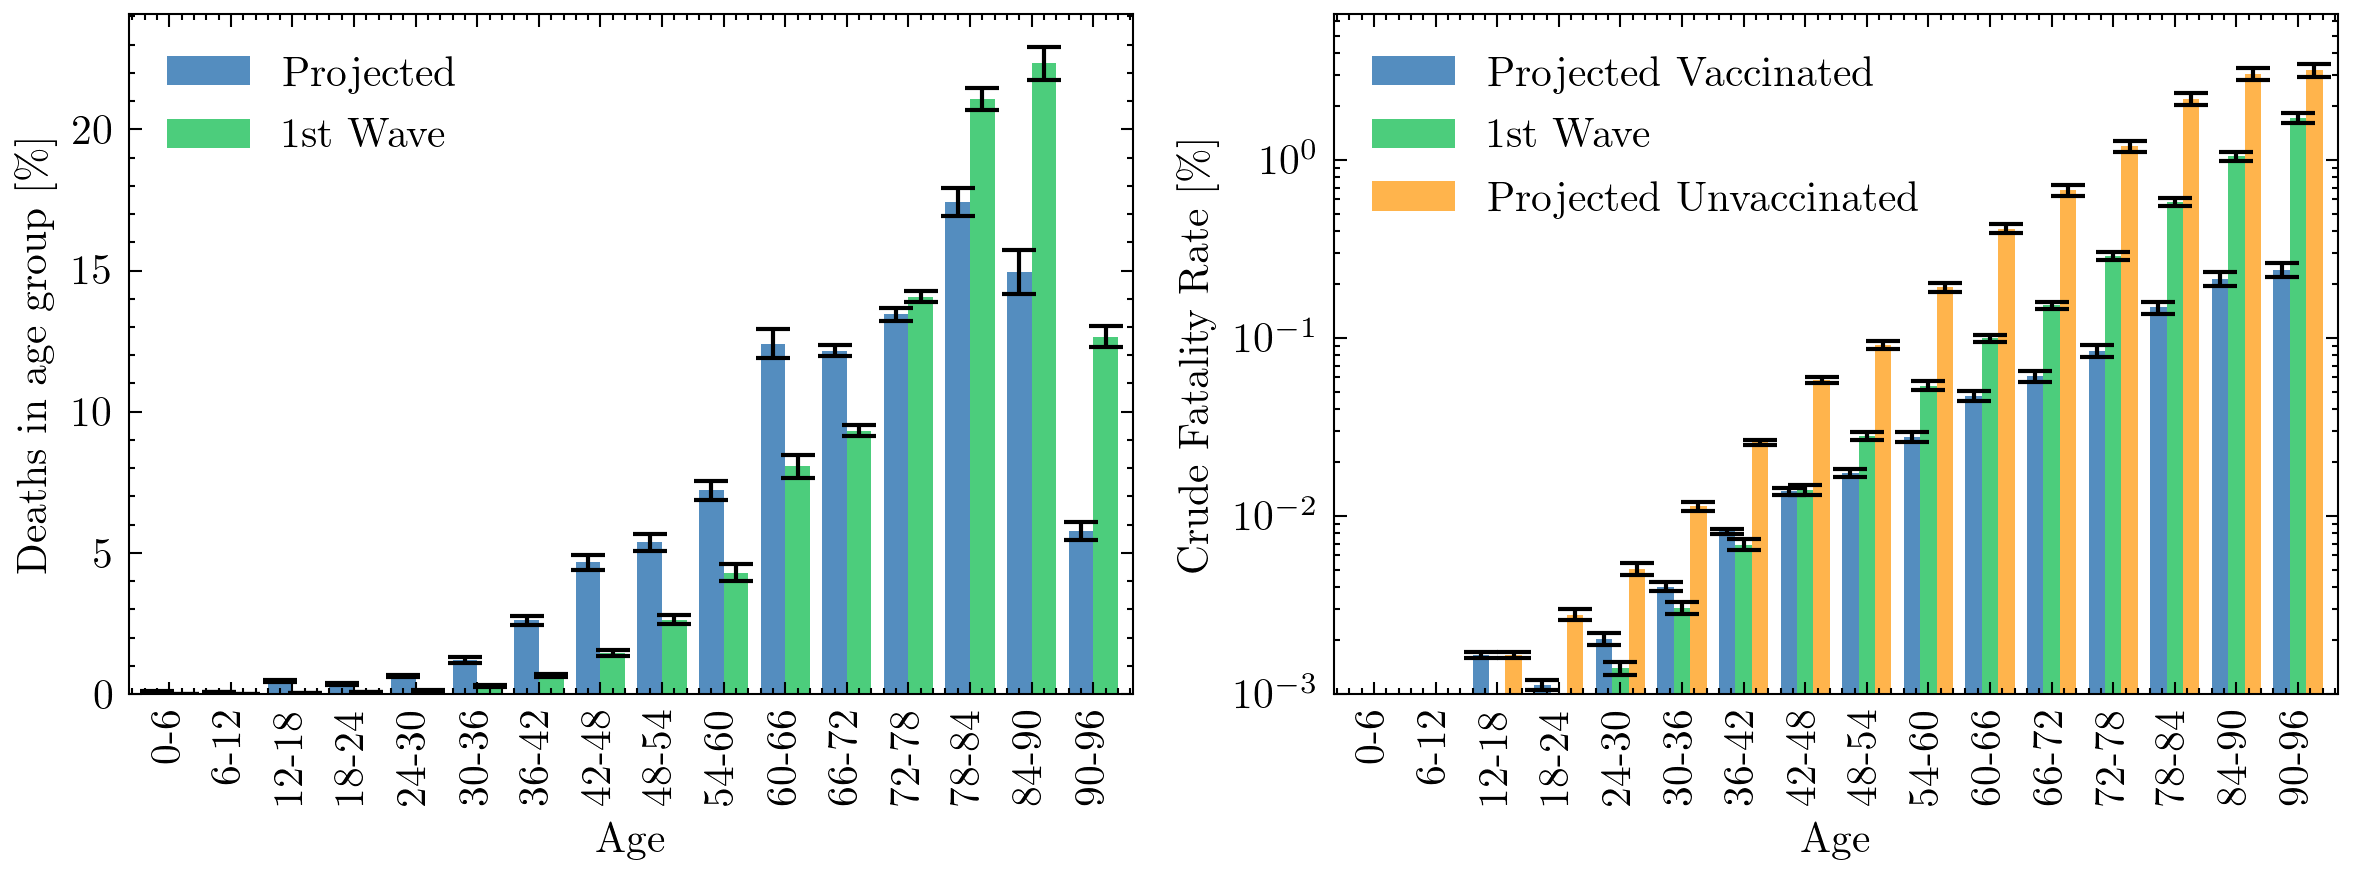

In [24]:
fig, ax = plt.subplots(ncols=2,sharex=False,sharey=False,figsize=(9.5,3.))


deaths_to_plot.plot.bar(
            capsize=4,
            ylabel="",
            xlabel="Age",
            width=0.8,
            alpha=0.7,
            ax=ax[0],
            yerr=std_deaths_to_plot,
        )
ax[0].set_ylabel('Deaths in age group [\%]')

dr_toplot.plot.bar(
            capsize=4,
            ylabel="Crude Fatality Rate [\%]",
            xlabel="Age",
            width=0.8,
            alpha=0.7,
            ax=ax[1],
            yerr=std_dr_toplot,
        )

ax[1].set_yscale('log')
ax[1].set_ylim(1e-3)

plt.savefig('../figures/crude_fatality_rates.pdf')

2021-09-22 13:13:17,563 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:17,567 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:17,569 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:17,570 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:17,572 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:17,573 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:17,575 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:22,360 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,361 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,363 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,365 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,367 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,368 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,370 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:22,930 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,932 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,935 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,937 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,991 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,993 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:22,995 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:23,251 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:23,252 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:23,253 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:23,255 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:23,256 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:23,257 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:23,261 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:25,465 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,465 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,468 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,469 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,473 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,473 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,477 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:25,635 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,637 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,640 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,642 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,664 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,665 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,669 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:25,835 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,836 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,838 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,840 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,841 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,842 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:25,844 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:26,586 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,587 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,589 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,591 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,592 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,593 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,595 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:26,712 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,716 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,718 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,719 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,722 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,722 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,724 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

2021-09-22 13:13:26,962 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,963 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,964 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,965 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,966 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,967 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-09-22 13:13:26,968 - matplotlib.texmanager - INFO - No LaTeX-compatible font found for the serif font family in rcParams. Using default.
2021-0

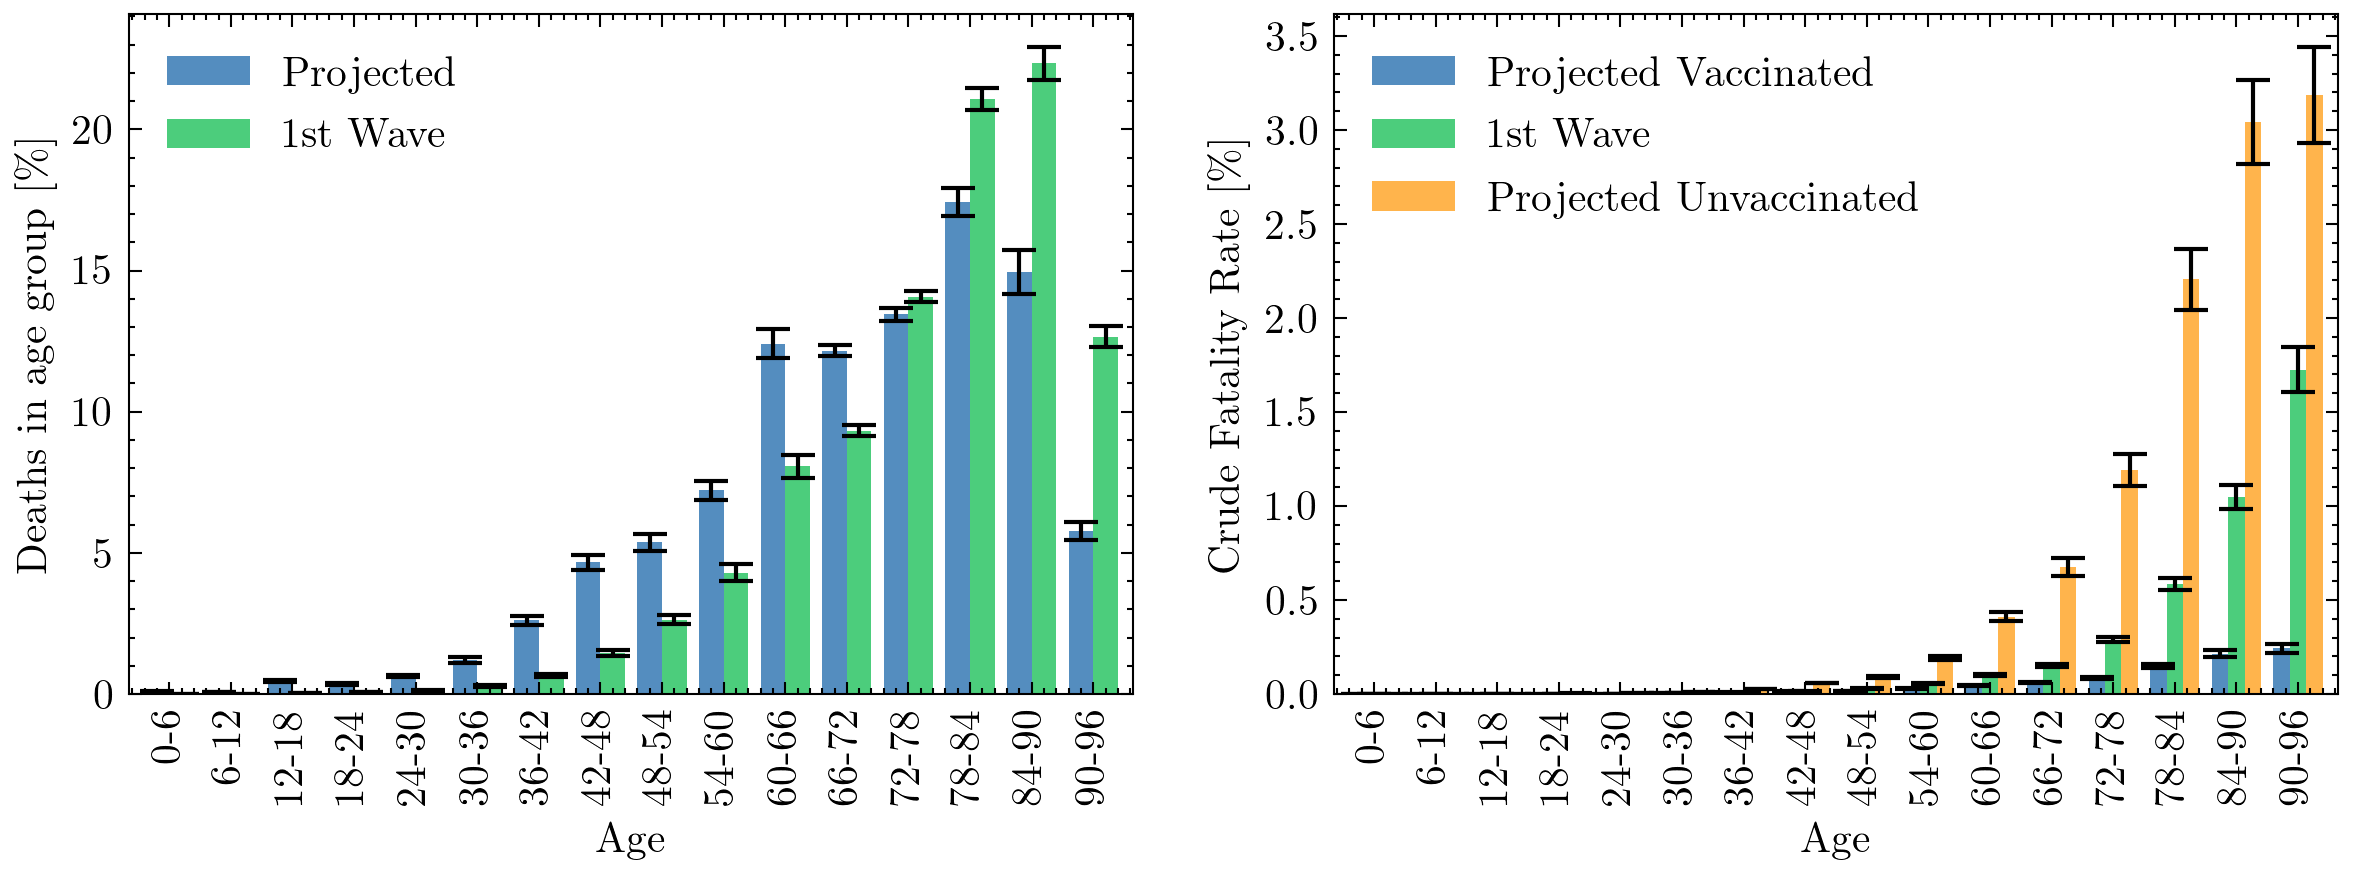

In [25]:
fig, ax = plt.subplots(ncols=2,sharex=False,sharey=False,figsize=(9.5,3.))


deaths_to_plot.plot.bar(
            capsize=4,
            ylabel="",
            xlabel="Age",
            width=0.8,
            alpha=0.7,
            ax=ax[0],
            yerr=std_deaths_to_plot,
        )
ax[0].set_ylabel('Deaths in age group [\%]')

dr_toplot.plot.bar(
            capsize=4,
            ylabel="Crude Fatality Rate [\%]",
            xlabel="Age",
            width=0.8,
            alpha=0.7,
            ax=ax[1],
            yerr=std_dr_toplot,
        )

plt.savefig('../figures/linear_crude_fatality_rates.pdf')